In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Atul Kumar\Documents\roboism\after end sem\train.csv')
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
...,...,...
694,58,58.595006
695,93,94.625094
696,82,88.603770
697,66,63.648685


In [3]:
arr=df.values
print(arr.shape)

x_train=arr[:,0].reshape(699,1)
y_train=arr[:,1].reshape(699,1)
print(arr[213,:])
print(y_train.shape)



(699, 2)
[72.         74.04682658]
(699, 1)


#  Visualizing The Data

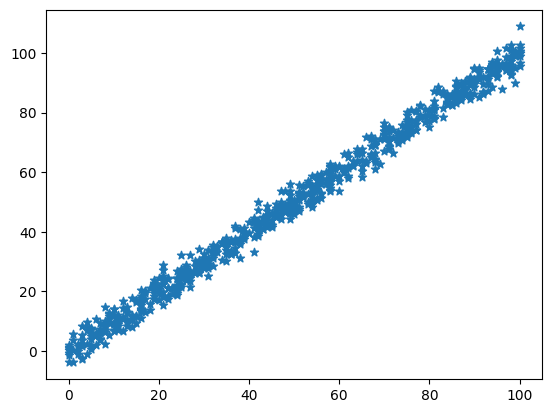

In [4]:
plt.scatter(x_train,y_train,marker="*")
plt.show()


# The Cost and Gradient Value Functions:

In [5]:
def cost_function(x,y,w,b):
    m=np.size(x,axis=0)
    cost = 1/(2*m)*(np.sum((x@w + b - y)**2))
    return cost  

In [6]:
def gradient_value(x,y,w,b):
    m=np.size(x,axis=0)
    error=np.dot(x,w)+b-y
    dj_dw=np.sum(np.dot(error.T,x))
    dj_db=np.sum(error)
    
    dj_dw_final=np.dot((np.divide(1,m)),dj_dw)
    dj_db_final=np.dot((np.divide(1,m)),dj_db)
    
    return dj_dw_final,dj_db_final
    

# Now Making The Model:

In [7]:
def model(x,y,w,b,cost,gradient,alpha,iters):
    
    j_history=[]
    f_history=[]
    m=np.size(y,axis=0)
    
    
    #f=function_output(x,w,b)
    
    for i in range(iters):

        f=np.dot(x,w)+b

        dj_dw,dj_db = gradient(x,y,w,b)   

        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db  
        if i<m:
            f_history.append(f)
       
        
        if i<m: 
            j_history.append(cost(x,y,w,b))

        
        if i% np.ceil(iters / 100) == 0:
            print("Iteration ",[i],": Cost ",[j_history[-1]])
        
    return w, b, f_history, j_history 


In [8]:
initial_w = np.zeros((1,1))
initial_b = 0
iterations = 1000
alpha = 0.000005

w_final, b_final,f_hist, j_hist = model(x_train, y_train,initial_w ,initial_b ,cost_function, gradient_value, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m=np.size(x_train,axis=0)
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final}, target value: {y_train[i]}")

Iteration  [0] : Cost  [1614.889141815067]
Iteration  [10] : Cost  [1154.2926096320878]
Iteration  [20] : Cost  [825.3877616582686]
Iteration  [30] : Cost  [590.5219051791897]
Iteration  [40] : Cost  [422.80783565199204]
Iteration  [50] : Cost  [303.0458168556129]
Iteration  [60] : Cost  [217.52561460149016]
Iteration  [70] : Cost  [156.45696305779427]
Iteration  [80] : Cost  [112.84878506715131]
Iteration  [90] : Cost  [81.70886073891796]
Iteration  [100] : Cost  [59.47232318984864]
Iteration  [110] : Cost  [43.59355620638604]
Iteration  [120] : Cost  [32.25477468772388]
Iteration  [130] : Cost  [24.15792645493698]
Iteration  [140] : Cost  [18.376092556789313]
Iteration  [150] : Cost  [14.247374530252971]
Iteration  [160] : Cost  [11.299120937168661]
Iteration  [170] : Cost  [9.193818707975911]
Iteration  [180] : Cost  [7.690454988534635]
Iteration  [190] : Cost  [6.616926233532089]
Iteration  [200] : Cost  [5.850335967529629]
Iteration  [210] : Cost  [5.302925721358125]
Iteration  [2

#  Train Data Accuracy

In [9]:
def compute_function_output(x,w,b):
    y_hat=np.dot(x,w)+b
    
    return y_hat

y_hat_final=compute_function_output(x_train,w_final,b_final)


In [10]:
def accuracy(y,y1):
    error=(1/(2*np.size(y,axis=0)))*np.sqrt((np.sum((y1-y)**2)))
    actual=(1-error)*100
    return actual

In [11]:
train_accuracy=accuracy(y_train,y_hat_final)
print("the accuracy of train data set is",train_accuracy,"%")

the accuracy of train data set is 94.69408998232586 %


## Test Data Accuracy 

In [12]:
dff = pd.read_csv(r'C:\Users\Atul Kumar\Documents\roboism\after end sem\test.csv')

In [13]:
test=dff.values
x_test=test[:,0].reshape(300,1)
y_test=test[:,1].reshape(300,1)

In [14]:
y_hat_test=compute_function_output(x_test,w_final,b_final)
test_accuracy=accuracy(y_test,y_hat_test)
print("the accuracy of test data set is",test_accuracy,"%")

the accuracy of test data set is 91.12250225756996 %
